<a href="https://colab.research.google.com/github/misterseyiayeni/SVHN_Digit_Recognition_System/blob/main/SVHN_Digit_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.



Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# --- Operating System ---
import os  # Interact with the operating system, such as accessing files and directories

# --- File I/O ---
import h5py  # Work with Hierarchical Data Format (HDF5) files, often used for large datasets

# --- Randomization ---
import random  # Generate random numbers and perform random tasks

# --- Numerical Computing ---
import numpy as np  # Perform numerical computations and array manipulation

# --- Data Analysis and Manipulation ---
import pandas as pd  # Work with tabular data, including DataFrames and Series

# --- Machine Learning and Deep Learning ---
from tensorflow import keras  # Import the Keras API for building and training deep learning models

# --- Model Architecture ---
from tensorflow.keras.models import Sequential  # Create sequential (linear-stack) model architectures
from tensorflow.keras.layers import (  # Define various neural network layers
   Conv2D,  # 2D convolutional layers for image processing
   LeakyReLU,  # Leaky rectified linear unit activation function
   MaxPooling2D,  # Max pooling layers for downsampling
   Flatten,  # Flatten layers to convert multi-dimensional data into 1D vectors
   Dense,  # Densely connected (fully connected) layers
   Dropout,  # Apply dropout regularization to prevent overfitting
   BatchNormalization  # Normalize layer inputs for faster and more stable training
)

# --- Model Optimization ---
from tensorflow.keras.optimizers import Adam  # Adam optimizer for model training

# --- Data Preparation ---
from tensorflow.keras.utils import to_categorical  # Convert class labels to one-hot encoded vectors

# --- Loss and Metrics ---
from tensorflow.keras.losses import CategoricalCrossentropy  # Categorical crossentropy loss function for multi-class classification
from tensorflow.keras.metrics import Accuracy  # Accuracy metric to evaluate model performance

# --- TensorFlow Backend ---
import tensorflow as tf  # Access and leverage TensorFlow's core functionalities

# --- Data Preprocessing ---
from sklearn.preprocessing import OneHotEncoder  # Perform one-hot encoding for categorical features

# --- Model Evaluation ---
from sklearn.metrics import (  # Evaluate model performance
   classification_report,  # Generate a detailed classification report
   confusion_matrix  # Visualize model performance with a confusion matrix
)

# --- Visualization ---
import matplotlib.pyplot as plt  # Create plots and visualizations with matplotlib
import seaborn as sns # Create plots and visualizations with seaborn

**Let us check the version of tensorflow.**

In [ ]:
# This will print the version of TensorFlow
print(f"The version of TensorFlow is {tf.__version__}")

The version of TensorFlow is 2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Change the current working directory to my Google Drive folder, read in the file, and extract the train and the test datasets
os.chdir('/content/drive/MyDrive/')
with h5py.File('SVHN_single_grey1.h5', 'r') as hdf_ANN:
    X_train = hdf_ANN.get('X_train')[:]
    y_train = hdf_ANN.get('y_train')[:]
    X_test = hdf_ANN.get('X_test')[:]
    y_test = hdf_ANN.get('y_test')[:]

Check the number of images in the training and the testing dataset.

In [ ]:
# Here, we want to check the number of images in the training and the testing dataset
print("The number of images in the training set is:", X_train.shape[0])
print("The number of images in the test set is:", X_test.shape[0])

The number of images in the training set is: 42000
The number of images in the test set is: 18000


**Observation:**
There are 42,000 images in the training set and 18,000 images in the test set.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

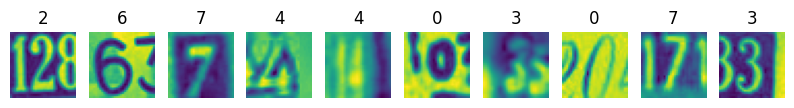

In [ ]:
# Plot the first 10 images using X_train to visualize and y_train to print the first 10 labels.
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape of first image in the training dataset: ", X_train[0].shape)
print("First image pixels:\n", X_train[0])

Shape of first image in the training dataset:  (32, 32)
First image pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalize and flatten the training data set to be able to pass it into the first hidden layer
X_train = X_train.reshape(-1, 1024)/255.0
X_test = X_test.reshape(-1, 1024)/255.0

Print the shapes of Training and Test data

In [ ]:
# Print the new shapes of the train and the test dataset.
print("New shape of training data: ", X_train.shape)
print("New shape of test data: ", X_test.shape)

New shape of training data:  (42000, 1024)
New shape of test data:  (18000, 1024)


### **One-hot encode output**

In [ ]:
# One-hot-encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**Observation:**

The shape of the training dataset was (42000, 32, 32) and test dataset was (18000, 32, 32).

After flattening the data, the shape of the training data set is now (42000, 1024) and test dataset is now (18000, 1024).

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
np.random.seed(42) # for the numpy functions
random.seed(42) # for random generation of numbers
tf.random.set_seed(42) # for the TensorFlow function

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def ann_model_1():
    # Create a Sequential Object
    model = Sequential()
    # Add the first hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
    model.add(Dense(64, input_shape = (1024, ), activation = 'relu'))
    # Add the second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation = 'relu'))
    # Add the output layer with 10 neurons
    model.add(Dense(10, activation = 'softmax'))
    # Compile the model with specified parameters
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    # Return the model
    return model

# Call the nn_model_1 and print the summary
model_ANN_1 = ann_model_1()
print(model_ANN_1.summary())

# Store the model building history
history_ANN_1 = model_ANN_1.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
263/263 [==============================] - 4s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 

### **Plot the Training and Validation Accuracies and write down your Observations.**

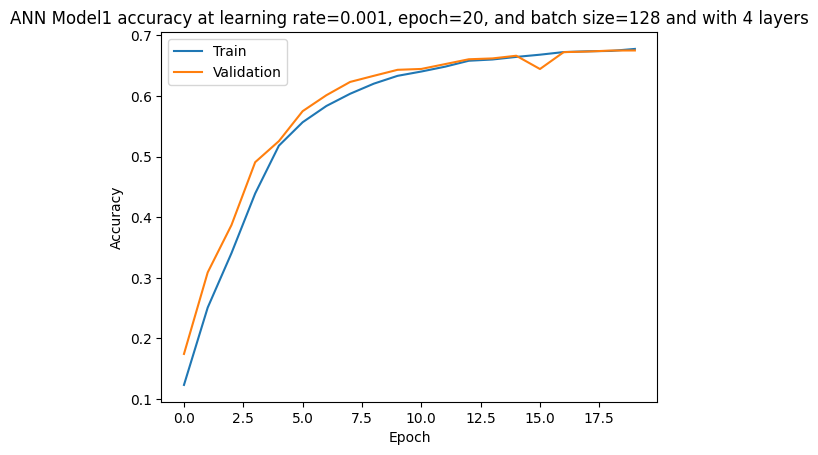

In [ ]:
# Get the training and validation accuracies
plt.plot(history_ANN_1.history['accuracy'])
plt.plot(history_ANN_1.history['val_accuracy'])
plt.title('ANN Model1 accuracy at learning rate=0.001, epoch=20, and batch size=128 and with 4 layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: The validation accuracy follows closely with the train accuracy and there is no sharp decline so the model doesn't appear to be overfitting. However, the model performance converges at less than 70%.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def ann_model_2():
  # Create a Sequential Object
    model = Sequential()
    # Add the first hidden layer with 256 neurons
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    # Add the second hidden layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    # Add the dropout layer with rate equal to 0.2
    model.add(Dropout(0.2))
    # Add third hidden layer with 64 neurons
    model.add(Dense(64, activation='relu'))
    # Add fourth layer with 64 neurons
    model.add(Dense(64, activation='relu'))
    # Add fifth hidden layer with 32 neurons
    model.add(Dense(32, activation='relu'))
    # Add a BatchNormalization layer
    model.add(BatchNormalization())
    # Add the output layer with 10 neurons as it has 10 classes
    model.add(Dense(10, activation='softmax'))
    # Compile the model with specified parameters
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
    return model

# Call the model and print its summary
model_ANN_2 = ann_model_2()
model_ANN_2.summary()

# Store the model's build history
history_ANN_2 = model_ANN_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

### **Plot the Training and Validation Accuracies and write down your Observations.**

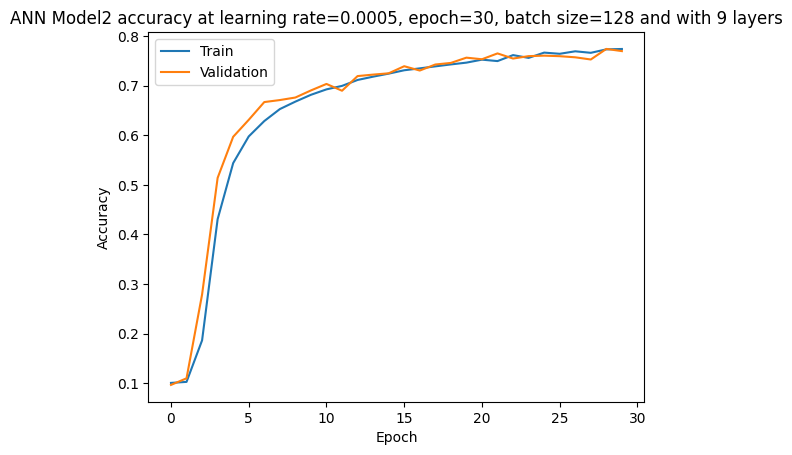

In [ ]:
# Get the training and validation scores
plt.plot(history_ANN_2.history['accuracy'])
plt.plot(history_ANN_2.history['val_accuracy'])
plt.title('ANN Model2 accuracy at learning rate=0.0005, epoch=30, batch size=128 and with 9 layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: Compared to the last model the accuracy is a bit higher but the variance is also quite higher. Also, the elbow point in this plot is quite similar to the last plot.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Predict on the test data
y_pred_ANN_2 = model_ANN_2.predict(X_test)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert prediction classes to single labels
y_pred_classes_ANN_2 = np.argmax(y_pred_ANN_2, axis = 1)
# Convert validation classes to single labels
y_true_ANN_2 = np.argmax(y_test, axis = 1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1814
           1       0.75      0.83      0.79      1828
           2       0.89      0.70      0.78      1803
           3       0.66      0.77      0.71      1719
           4       0.82      0.82      0.82      1812
           5       0.75      0.73      0.74      1768
           6       0.77      0.79      0.78      1832
           7       0.76      0.84      0.79      1808
           8       0.70      0.74      0.72      1812
           9       0.84      0.70      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000

[[1423   64    3   56   40   12   70   46   47   53]
 [  39 1512   17   48   56   17   29   65   30   15]
 [  18   48 1262   83   36   34   25  214   43   40]
 [  26   49   21 1320   24  124   22   56   64   13]
 [  33   72   19   51 1489   

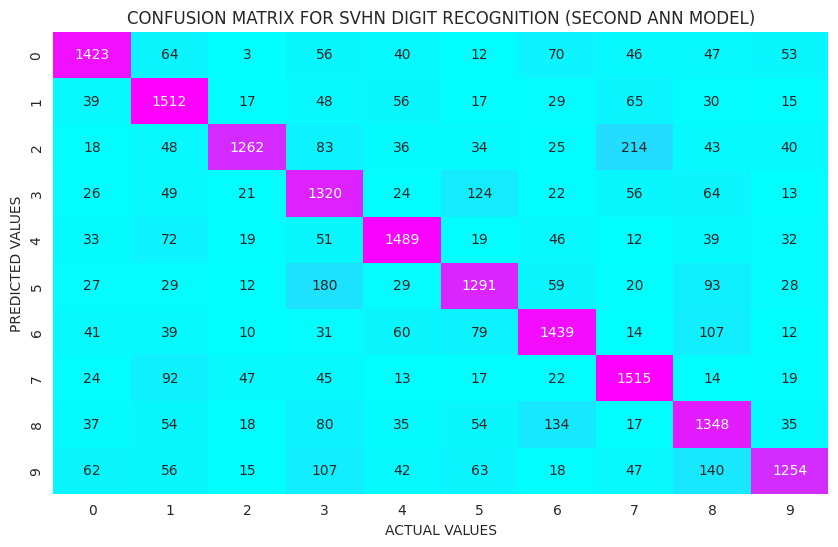

In [ ]:
# Print the classification report and the confusion matrix
print(classification_report(y_true_ANN_2, y_pred_classes_ANN_2))
print(confusion_matrix(y_true_ANN_2, y_pred_classes_ANN_2))

# In addition, we can also plot the confusion matrix in a graphic

# Set style as dark
sns.set_style("dark")

# Set figure size
plt.figure(figsize = (10, 6))

# Plot the title
plt.title("CONFUSION MATRIX FOR SVHN DIGIT RECOGNITION (SECOND ANN MODEL)")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_true_ANN_2], y_pred_classes_ANN_2)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

**Final Observations:**

Key Metrics:

* Overall Accuracy: 76% of the test samples were correctly classified.
* Precision: Measures the proportion of predicted positives that are actually correct. Average precision across classes is 76%.
* Recall: Measures the proportion of actual positives that are correctly identified. Average recall across classes is 76%.
* F1-score: Combines precision and recall into a single metric, indicating balanced performance. Average F1-score is 76%.

Class-Specific Performance:
* Class 0: Good precision (84%) but lower recall (75%), suggesting some actual "0" samples are being missed.
* Class 3: Lowest precision (62%) and recall (77%), indicating room for improvement in identifying both true "3" samples and avoiding false positives.
* Classes 4, 7, and 9: Relatively high precision and recall, suggesting good performance in identifying these classes.

Confusion Matrix:
* Diagonal Elements: Represent correct predictions for each class.
* Off-diagonal Elements: Reflect misclassifications. For example, 79 samples of class 0 were incorrectly predicted as class 1.
* Class 3 Misclassifications: Notable errors with classes 5 and 6, suggesting potential confusion between these classes.

Insights:
* Overall Performance: The model achieves a moderate level of accuracy but has room for improvement.
* Class Imbalance: Consider exploring techniques to address potential class imbalances if they exist in the dataset.
* Error Analysis: Focus on classes with lower performance (e.g., class 3) to identify areas for improvement.
* Confusion Patterns: Examine the confusion matrix to understand common misclassifications and guide model refinements.

Recommended Next Steps:
* Investigate strategies to improve recall for classes with lower recall scores.
* Explore techniques to address class imbalance if applicable.
* Analyze errors in detail to identify patterns and potential causes.
* Consider model adjustments, data augmentation, or feature engineering to enhance performance.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Read in the file for CNN model run, and extract the train and the test datasets
with h5py.File('SVHN_single_grey1.h5', 'r') as hdf_CNN:
    X_train_CNN = hdf_CNN.get('X_train')[:]
    y_train_CNN = hdf_CNN.get('y_train')[:]
    X_test_CNN = hdf_CNN.get('X_test')[:]
    y_test_CNN = hdf_CNN.get('y_test')[:]

Check the number of images in the training and the testing dataset.

In [ ]:
# Check the number of images in the training and the testing dataset
print("Number of images in training set: ", X_train_CNN.shape[0])
print("Number of images in test set: ", X_test_CNN.shape[0])

Number of images in training set:  42000
Number of images in test set:  18000


**Observation:**
There are 42000 images in the training dataset and 18000 images in the test dataset

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# The shape and array of pixels for the first image in the training dataset
print("Shape of first image in the training dataset: ", X_train_CNN[0].shape)
print("First image pixels:\n", X_train_CNN[0])

Shape of first image in the training dataset:  (32, 32)
First image pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the dataset to be able to pass them to CNNs
X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], 32, 32, 1)
X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1
X_train_CNN = X_train_CNN / 255.0
X_test_CNN = X_test_CNN / 255.0

Print New shape of Training and Test

In [ ]:
# Print the new shape of training and test data
print("Shape of Training data: ", X_train_CNN.shape)
print("Shape of Test data: ", X_test_CNN.shape)

Shape of Training data:  (42000, 32, 32, 1)
Shape of Test data:  (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot-encode the labels
y_train_CNN = to_categorical(y_train_CNN, num_classes=10)
y_test_CNN = to_categorical(y_test_CNN, num_classes=10)

**Observation:**
The shape of the training dataset was (42000, 32, 32) and test dataset was (18000, 32, 32). After reshaping, the shape of the training data set is now (42000, 32, 32, 1) and that of test dataset is now (18000, 32, 32, 1).

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
  # Create the sequential model
  model = Sequential()
  # Add the first convolutional layer with 16 filters and the kernel size of 3x3
  model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
  # Add LeakyRelu activation function with a slope of 0.1
  model.add(LeakyReLU(0.1))
  # Add the second convolutional layer with 32 filters and the kernel size of 3x3
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
  # Add LeakyRelu activation function with a slope of 0.1
  model.add(LeakyReLU(0.1))
  # Add max pooling layer to reduce the size of the output of second convolutional layer
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Flatten the 3-d output of the convolutional layer
  model.add(Flatten())
  # Add a dense layer with 32 nodes
  model.add(Dense(32))
  # Add LeakyRelu activation function with a slope of 0.1
  model.add(LeakyReLU(0.1))
  # Add the final output layer with 10 nodes
  model.add(Dense(10, activation='softmax'))
  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

# Call the function cnn_model_1 and print the summary
model_CNN_1 = cnn_model_1()
model_CNN_1.summary()

# Build and train the model
history_CNN_1 = model_CNN_1.fit(X_train_CNN, y_train_CNN, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

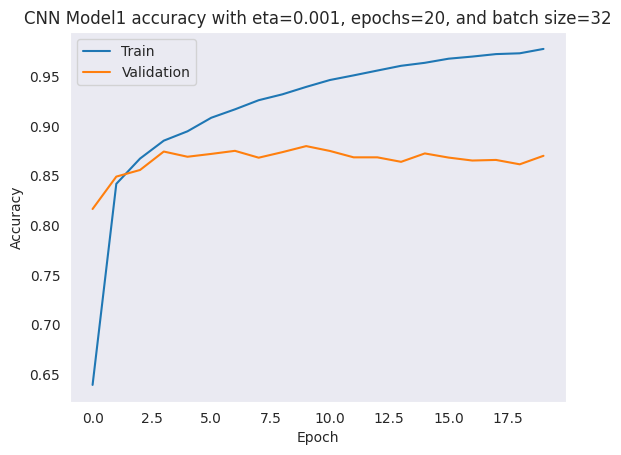

In [ ]:
# Plot the training and validation accuracy scores
plt.plot(history_CNN_1.history['accuracy'])
plt.plot(history_CNN_1.history['val_accuracy'])
plt.title('CNN Model1 accuracy with eta=0.001, epochs=20, and batch size=32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: This model appears to be overfitting because there is a wide variance between the validation score and the train score. Its performance is still the highest so far but it is not generalizing well to new or out-of-band data.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
    # Create the sequential model
    model = Sequential()
    # Add the first convolutional layer with 16 filters and the kernel size of 3x3
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    # Add LeakyRelu activation function with a slope of 0.1
    model.add(LeakyReLU(0.1))
    # Add the second convolutional layer with 32 filters and the kernel size of 3x3
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    # Add LeakyRelu activation function with a slope of 0.1
    model.add(LeakyReLU(0.1))
    # Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Add a BatchNormalization layer
    model.add(BatchNormalization())
    # Add the third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    # Add LeakyRelu activation function with a slope of 0.1
    model.add(LeakyReLU(0.1))
    # Add the fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    # Add LeakyRelu activation function with a slope of 0.1
    model.add(LeakyReLU(0.1))
    # Add a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Add a BatchNormalization layer
    model.add(BatchNormalization())
    # Flatten the 3-d output of the convolutional layer
    model.add(Flatten())
    # Add a dense layer with 32 nodes
    model.add(Dense(32))
    # Add LeakyRelu activation function with a slope of 0.1
    model.add(LeakyReLU(0.1))
    # Add the dropout layer with rate equal to 0.5
    model.add(Dropout(0.5))
    # Add the final output layer with 10 nodes
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Fit the model and print its summary
model_CNN_2 = cnn_model_2()
model_CNN_2.summary()

# Build and train the second CNN model
history_CNN_2 = model_CNN_2.fit(X_train_CNN, y_train_CNN, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

### **Plot the Training and Validation accuracies and write your observations.**

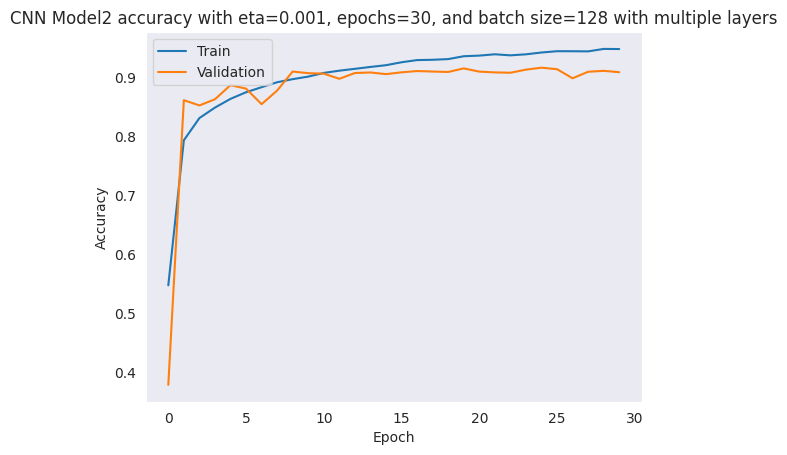

In [ ]:
# Plot the training and Validation accuracy scores
plt.plot(history_CNN_2.history['accuracy'])
plt.plot(history_CNN_2.history['val_accuracy'])
plt.title('CNN Model2 accuracy with eta=0.001, epochs=30, and batch size=128 with multiple layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations: This is the best performance so far. The variance between the validation score and training score is the lowest and is close enough to qualify as a model that is not overfitting.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make predictions on the test data using the second CNN model
y_pred_CNN_2 = model_CNN_2.predict(X_test_CNN)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert predictions classes to a single label
y_pred_classes_CNN_2 = np.argmax(y_pred_CNN_2, axis = 1)
# Convert validation observations to a single label
y_true_CNN_2 = np.argmax(y_test_CNN, axis = 1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1814
           1       0.90      0.91      0.91      1828
           2       0.95      0.89      0.92      1803
           3       0.91      0.86      0.88      1719
           4       0.93      0.92      0.93      1812
           5       0.89      0.92      0.90      1768
           6       0.92      0.88      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.90      0.89      0.89      1812
           9       0.89      0.90      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

[[1744   13    2    5    4    1   12    6    6   21]
 [  44 1672   12   10   30    4    7   26   10   13]
 [  32   24 1604   17   27    6    2   34   22   35]
 [  15   22   13 1475    9   81   22   14   43   25]
 [  19   43   11   12 1665   

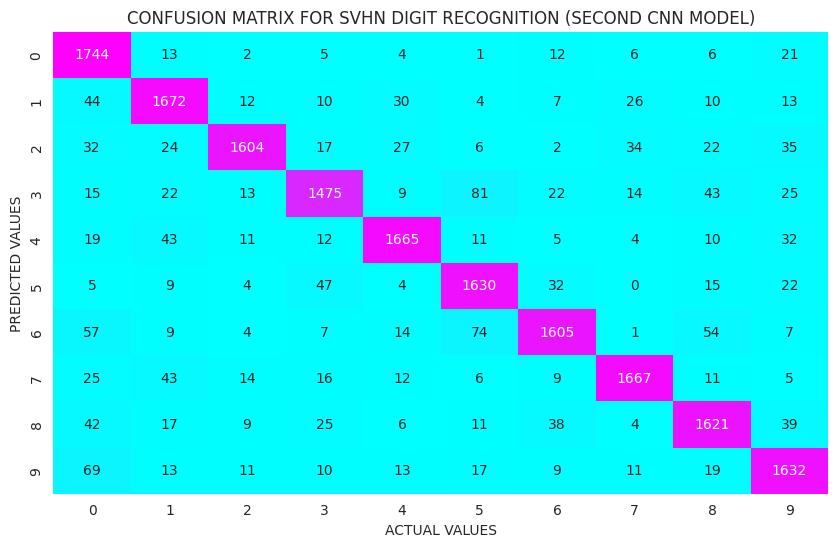

In [ ]:
# Print the classification report and the confusion matrix
print(classification_report(y_true_CNN_2, y_pred_classes_CNN_2))
print(confusion_matrix(y_true_CNN_2, y_pred_classes_CNN_2))

# We can also plot the confusion matrix

# Set style as dark
sns.set_style("dark")

# Set figure size
plt.figure(figsize = (10, 6))

# Plot the title
plt.title("CONFUSION MATRIX FOR SVHN DIGIT RECOGNITION (SECOND CNN MODEL)")

# Confusion matrix
cm = confusion_matrix([int(x) for x in y_true_CNN_2], y_pred_classes_CNN_2)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

**Decision:**

I am choosing this approach as the final solution because this is the best performing model so far. The variance between the validation score and training score is the lowest and is close enough to qualify as a model that is not overfitting. The precision, recall, and F1-Score scores are the highest.
Also, the model has multiple layers that ensure performance improvement while avoiding overfitting so this model has the highest potential of all the models tested. The layers are listed below:

1. LeakyReLU Activation:

* Improves performance: It addresses the "dying ReLU" problem by allowing a small gradient flow even for negative inputs, helping to prevent neurons from becoming inactive.
* Prevents overfitting: It introduces some non-linearity, allowing the model to learn more complex patterns without overfitting to the training data.

2. MaxPooling2D Layers:
* Improves performance: Reduces spatial dimensions, making computations more efficient and focusing on important features.
* Prevents overfitting: Introduces spatial invariance, making the model less sensitive to small shifts or distortions in the input data.

3. BatchNormalization Layers:
* Improves performance: Normalizes the activations of the previous layer, stabilizing the training process and often accelerating convergence.
* Prevents overfitting: Acts as a regularizer, reducing the model's sensitivity to the scale of input features.

4. Dropout Layer:
* Prevents overfitting: Randomly drops out neurons during training, forcing the model to learn more robust features and reducing its reliance on any single neuron or connection.

5. LeakyReLU in Dense Layer:
* Improves performance: Similar to its use in convolutional layers, it addresses the "dying ReLU" problem and introduces non-linearity for better learning.

**Final Observations:**

Key Metrics:

* Overall Accuracy: 91% of the test samples were correctly classified, indicating strong overall performance, the highest so far.
*Precision: High scores across all classes (average 0.91), suggesting a low rate of false positives, the highest so far.
*Recall: Also high scores across classes (average 0.91), indicating a good ability to identify true positives, the highest so far.
*F1-score: Balanced scores (average 0.91), representing a harmonious combination of precision and recall, the highest so far. This is a representation of the model's balance of precision (making accurate positive predictions) and recall(finding a good proportion of the actual positives).

Class-Specific Performance:
* Classes 4, 5, 7, and 9: Outstanding precision, recall, and F1-scores (all above 0.92), demonstrating excellent classification ability for these classes.
*Classes 0, 2, and 8: Similarly strong scores, with F1-scores above 0.90.
* Class 3: Slightly lower precision and recall (0.90 and 0.89, respectively), suggesting a minor area for potential improvement.

Confusion Matrix:
* Diagonal Elements: Large numbers reflect correct predictions for each class, reinforcing the high accuracy.
* Off-diagonal Elements: Relatively low values indicate few misclassifications, particularly for classes with high scores.
* Notable Misclassifications:
 - Class 3 has some confusion with classes 5 and 6, suggesting potential similarities between them.

Insights:
* Excellent Overall Performance: The model achieves an impressive level of accuracy and balanced scores across classes.
* Minor Area for Improvement: Class 3 could potentially benefit from further analysis and refinement.
* Minimal Misclassifications: The confusion matrix demonstrates the model's ability to effectively distinguish between classes.

Recommended Next Steps:
* Consider exploring techniques to further enhance performance for class 3, such as adjusting model architecture or addressing potential data imbalances.
* Continue to monitor model performance and investigate any emerging patterns of misclassification.
* Explore potential model optimizations or feature engineering to potentially push performance even higher.